In [42]:
import subprocess as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from abutils.utils.pipeline import list_files
import os

# D103

In [3]:
shared_cmd="grep '      2 I' data/dedup_cross-year_clonotype_pools/D103-2016-D103-2021_dedup_pool_vj-aa_with-counts.txt"


p = sp.Popen(shared_cmd, stdout=sp.PIPE, stderr=sp.PIPE, shell=True, encoding='utf8')
stdout, stderr = p.communicate()

shared=stdout.split('\n')[:-1]
shared=[s[8:] for s in shared]

In [4]:
chain_field=2
prod_field = 3
v_field = 5
j_field = 9
cdr3aa_field = 20
vdjnt_field = 22

In [5]:
shm_mean={}
shm_counts={}
isotype_counts={}

for i in range(1,7):
    print(i)
    
    sequence_data=[]
    with open(f'data/techrep_merged/D103-2016/D103-2016_biorep{str(i)}') as f:
        for line in f:
            data = line.strip().split(',')
            if data[prod_field] != 'yes' or data[chain_field] != 'heavy':
                continue
            v_gene = data[v_field]
            j_gene = data[j_field]
            cdr3_aa = data[cdr3aa_field]
            vdj_nt = data[vdjnt_field]
            mut_count=data[29]
            iso=data[32][:3]
            clonotype = ' '.join([v_gene, j_gene, cdr3_aa])
            sequence_data.append(f"{clonotype},{vdj_nt},{mut_count},{iso}\n")
        
    with open(f'/data/D103-2016_biorep{str(i)}.csv', 'w') as f:
        f.write('clonotype,vdj_nt,mut_count,isotype\n'+''.join(np.unique(sequence_data)))
        
    del sequence_data
    
    df=pd.read_csv(f'/data/D103-2016_biorep{str(i)}.csv')
    
    shm_mean['shared_'+str(i)]=np.mean(df.loc[df['clonotype'].isin(shared)]['mut_count'])
    shm_counts['shared_'+str(i)]=dict(Counter(df.loc[df['clonotype'].isin(shared)]['mut_count']))
    isotype_counts['shared_'+str(i)]=dict(Counter(df.loc[df['clonotype'].isin(shared)]['isotype']))
    
    shm_mean['unshared_'+str(i)]=np.mean(df.loc[~df['clonotype'].isin(shared)]['mut_count'])
    shm_counts['unshared_'+str(i)]=dict(Counter(df.loc[~df['clonotype'].isin(shared)]['mut_count']))
    isotype_counts['unshared_'+str(i)]=dict(Counter(df.loc[~df['clonotype'].isin(shared)]['isotype']))

pd.DataFrame(isotype_counts).T[['IgM', 'IgG']].T.to_csv('data/shared_unshared_cdr3aa/D103-2016_isotype_counts.csv')
pd.DataFrame(shm_counts).fillna(0).to_csv('data/shared_unshared_cdr3aa/D103-2016_shm_counts.csv')
pd.DataFrame({'Average mut counts':shm_mean}).T.to_csv('data/shared_unshared_cdr3aa/D103-2016_shm_means.csv')


1
2
3
4
5
6


In [26]:
shm_mean={}
shm_counts={}
isotype_counts={}

for i in range(1,7):
    print(i)
    
    sequence_data=[]
    with open(f'data/techrep_merged/D103-2021/D103-2021_biorep{str(i)}') as f:
        for line in f:
            data = line.strip().split(',')
            if data[prod_field] != 'yes' or data[chain_field] != 'heavy':
                continue
            v_gene = data[v_field]
            j_gene = data[j_field]
            cdr3_aa = data[cdr3aa_field]
            vdj_nt = data[vdjnt_field]
            mut_count=data[29]
            iso=data[32][:3]
            clonotype = ' '.join([v_gene, j_gene, cdr3_aa])
            sequence_data.append(f"{clonotype},{vdj_nt},{mut_count},{iso}\n")
        
    with open(f'/data/D103-2021_biorep{str(i)}.csv', 'w') as f:
        f.write('clonotype,vdj_nt,mut_count,isotype\n'+''.join(np.unique(sequence_data)))
        
    del sequence_data
    
    df=pd.read_csv(f'/data/D103-2021_biorep{str(i)}.csv')
    
    shm_mean['shared_'+str(i)]=np.mean(df.loc[df['clonotype'].isin(shared)]['mut_count'])
    shm_counts['shared_'+str(i)]=dict(Counter(df.loc[df['clonotype'].isin(shared)]['mut_count']))
    isotype_counts['shared_'+str(i)]=dict(Counter(df.loc[df['clonotype'].isin(shared)]['isotype']))
    
    shm_mean['unshared_'+str(i)]=np.mean(df.loc[~df['clonotype'].isin(shared)]['mut_count'])
    shm_counts['unshared_'+str(i)]=dict(Counter(df.loc[~df['clonotype'].isin(shared)]['mut_count']))
    isotype_counts['unshared_'+str(i)]=dict(Counter(df.loc[~df['clonotype'].isin(shared)]['isotype']))

pd.DataFrame(isotype_counts).T[['IgM', 'IgG']].T.to_csv('data/shared_unshared_cdr3aa/D103-2021_isotype_counts.csv')
pd.DataFrame(shm_counts).fillna(0).to_csv('data/shared_unshared_cdr3aa/D103-2021_shm_counts.csv')
pd.DataFrame({'Average mut counts':shm_mean}).T.to_csv('data/shared_unshared_cdr3aa/D103-2021_shm_means.csv')

1
2
3
4
5
6


# 327059

In [27]:
shared_cmd="grep '      2 I' data/dedup_cross-year_clonotype_pools/327059-2016-327059-2020_dedup_pool_vj-aa_with-counts.txt"


p = sp.Popen(shared_cmd, stdout=sp.PIPE, stderr=sp.PIPE, shell=True, encoding='utf8')
stdout, stderr = p.communicate()

shared=stdout.split('\n')[:-1]
shared=[s[8:] for s in shared]

In [28]:
chain_field=2
prod_field = 3
v_field = 5
j_field = 9
cdr3aa_field = 20
vdjnt_field = 22

In [29]:
shm_mean={}
shm_counts={}
isotype_counts={}

for i in range(1,7):
    print(i)
    
    sequence_data=[]
    with open(f'data/techrep_merged/327059-2016/327059-2016_biorep{str(i)}') as f:
        for line in f:
            data = line.strip().split(',')
            if data[prod_field] != 'yes' or data[chain_field] != 'heavy':
                continue
            v_gene = data[v_field]
            j_gene = data[j_field]
            cdr3_aa = data[cdr3aa_field]
            vdj_nt = data[vdjnt_field]
            mut_count=data[29]
            iso=data[32][:3]
            clonotype = ' '.join([v_gene, j_gene, cdr3_aa])
            sequence_data.append(f"{clonotype},{vdj_nt},{mut_count},{iso}\n")
        
    with open(f'/data/327059-2016_biorep{str(i)}.csv', 'w') as f:
        f.write('clonotype,vdj_nt,mut_count,isotype\n'+''.join(np.unique(sequence_data)))
        
    del sequence_data
    
    df=pd.read_csv(f'/data/327059-2016_biorep{str(i)}.csv')
    
    shm_mean['shared_'+str(i)]=np.mean(df.loc[df['clonotype'].isin(shared)]['mut_count'])
    shm_counts['shared_'+str(i)]=dict(Counter(df.loc[df['clonotype'].isin(shared)]['mut_count']))
    isotype_counts['shared_'+str(i)]=dict(Counter(df.loc[df['clonotype'].isin(shared)]['isotype']))
    
    shm_mean['unshared_'+str(i)]=np.mean(df.loc[~df['clonotype'].isin(shared)]['mut_count'])
    shm_counts['unshared_'+str(i)]=dict(Counter(df.loc[~df['clonotype'].isin(shared)]['mut_count']))
    isotype_counts['unshared_'+str(i)]=dict(Counter(df.loc[~df['clonotype'].isin(shared)]['isotype']))

pd.DataFrame(isotype_counts).T[['IgM', 'IgG']].T.to_csv('data/shared_unshared_cdr3aa/327059-2016_isotype_counts.csv')
pd.DataFrame(shm_counts).fillna(0).to_csv('data/shared_unshared_cdr3aa/327059-2016_shm_counts.csv')
pd.DataFrame({'Average mut counts':shm_mean}).T.to_csv('data/shared_unshared_cdr3aa/327059-2016_shm_means.csv')


1
2
3
4
5
6


In [30]:
shm_mean={}
shm_counts={}
isotype_counts={}

for i in range(1,7):
    print(i)
    
    sequence_data=[]
    with open(f'data/techrep_merged/327059-2020/327059-2020_biorep{str(i)}') as f:
        for line in f:
            data = line.strip().split(',')
            if data[prod_field] != 'yes' or data[chain_field] != 'heavy':
                continue
            v_gene = data[v_field]
            j_gene = data[j_field]
            cdr3_aa = data[cdr3aa_field]
            vdj_nt = data[vdjnt_field]
            mut_count=data[29]
            iso=data[32][:3]
            clonotype = ' '.join([v_gene, j_gene, cdr3_aa])
            sequence_data.append(f"{clonotype},{vdj_nt},{mut_count},{iso}\n")
        
    with open(f'/data/327059-2020_biorep{str(i)}.csv', 'w') as f:
        f.write('clonotype,vdj_nt,mut_count,isotype\n'+''.join(np.unique(sequence_data)))
        
    del sequence_data
    
    df=pd.read_csv(f'/data/327059-2020_biorep{str(i)}.csv')
    
    shm_mean['shared_'+str(i)]=np.mean(df.loc[df['clonotype'].isin(shared)]['mut_count'])
    shm_counts['shared_'+str(i)]=dict(Counter(df.loc[df['clonotype'].isin(shared)]['mut_count']))
    isotype_counts['shared_'+str(i)]=dict(Counter(df.loc[df['clonotype'].isin(shared)]['isotype']))
    
    shm_mean['unshared_'+str(i)]=np.mean(df.loc[~df['clonotype'].isin(shared)]['mut_count'])
    shm_counts['unshared_'+str(i)]=dict(Counter(df.loc[~df['clonotype'].isin(shared)]['mut_count']))
    isotype_counts['unshared_'+str(i)]=dict(Counter(df.loc[~df['clonotype'].isin(shared)]['isotype']))

pd.DataFrame(isotype_counts).T[['IgM', 'IgG']].T.to_csv('data/shared_unshared_cdr3aa/327059-2020_isotype_counts.csv')
pd.DataFrame(shm_counts).fillna(0).to_csv('data/shared_unshared_cdr3aa/327059-2020_shm_counts.csv')
pd.DataFrame({'Average mut counts':shm_mean}).T.to_csv('data/shared_unshared_cdr3aa/327059-2020_shm_means.csv')

1
2
3
4
5
6


In [31]:
!ls data/shared_unshared_cdr3aa/

327059-2016_isotype_counts.csv	D103-2016_isotype_counts.csv
327059-2016_shm_counts.csv	D103-2016_shm_counts.csv
327059-2016_shm_means.csv	D103-2016_shm_means.csv
327059-2020_isotype_counts.csv	D103-2021_isotype_counts.csv
327059-2020_shm_counts.csv	D103-2021_shm_counts.csv
327059-2020_shm_means.csv	D103-2021_shm_means.csv
327059-shared-cdr3aa		D103-shared-cdr3aa
327059-unshared-cdr3aa		D103-unshared-cdr3aa


In [34]:
df=pd.read_csv('data/shared_unshared_cdr3aa/327059-2020_isotype_counts.csv', index_col=0)

In [35]:
df/df.sum()

,shared_1,unshared_1,shared_2,unshared_2,shared_3,unshared_3,shared_4,unshared_4,shared_5,unshared_5,shared_6,unshared_6
IgM,0.823881,0.93269,0.782234,0.920984,0.81879,0.933402,0.82098,0.937288,0.824147,0.93549,0.831534,0.927104
IgG,0.176119,0.06731,0.217766,0.079016,0.18121,0.066598,0.17902,0.062712,0.175853,0.06451,0.168466,0.072896


In [38]:
df.at['IgM', 'shared_1']

214055

In [45]:
iso_data=[]

for file in list_files('data/shared_unshared_cdr3aa/'):
    if 'isotype' in file:
        df=pd.read_csv(file, index_col=0)
        
        for c in df.columns:
            igm=df.at['IgM', c]
            igg=df.at['IgG', c]
            total=igm+igg
            if 'unshared' in c:
                iso_data.append({'year': os.path.basename(file).split('_')[0], 
                                 'Isotype': 'IgM', 
                                 'Frequency': igm / total, 
                                 'shared':'unshared'})
                iso_data.append({'year': os.path.basename(file).split('_')[0], 
                                 'Isotype': 'IgG', 
                                 'Frequency': igg / total, 
                                 'shared':'unshared'})
                

            else:
                iso_data.append({'year': os.path.basename(file).split('_')[0], 
                                 'Isotype': 'IgM', 
                                 'Frequency': igm / total, 
                                 'shared':'shared'})
                iso_data.append({'year': os.path.basename(file).split('_')[0], 
                                 'Isotype': 'IgG', 
                                 'Frequency': igg / total, 
                                 'shared':'shared'})
                

In [127]:
isotype_df=pd.DataFrame(iso_data)

In [154]:
color_dict={'shared': 'red', 'unshared': '.5'}
# color_dict={'D103-2016': '#9501d3',
#  'D103-2021': '#00befe',
#  '327059-2016': '#FF7B54',
#  '327059-2020': '#FFD56F'}

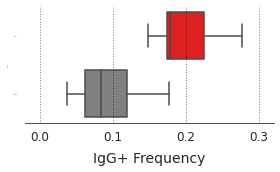

In [167]:
# initialize the plot
sns.set_style('white')
plt.figure(figsize=(4, 2.5))

# plot the isotype data
# sns.stripplot(data=isotype_df.loc[isotype_df['Isotype']=='IgG'], y='shared', x='Frequency', hue='shared', order=['shared', 'unshared'],
#               size=8, palette=color_dict, jitter=True, alpha=0.6, orient='h')

# plot the isotype data
sns.boxplot(data=isotype_df.loc[isotype_df['Isotype']=='IgG'], y='shared', x='Frequency', order=['shared', 'unshared'],
#               size=8, 
            palette=color_dict, #jitter=True, alpha=0.6, 
             orient='h')

# plot the vertical reference lines

#style the plot
ax = plt.gca()
# set axis limits and labels
ax.set_xlim([-0.02, 0.32])
ax.set_ylabel('Isotype', size=0, labelpad=4)
ax.set_xlabel('IgG+ Frequency', size=14, labelpad=8)
# set tick params
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=0, length=0, width=1.25, pad=8, right=False)
# hide top, left and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for x in np.arange(0, 0.4, 0.1):
    ls = ':'
    lw = 1
    alpha=0.5
    plt.axvline(x=x, #ymin=0, ymax=10, 
                linewidth=lw, color='k', linestyle=ls, alpha=alpha)
# plot the mean IgM frequency
# plt.axvline(x=np.mean(igms), ymin=0.5, ymax=0.9, color='k', linestyle='dotted')
# ax.text(np.mean(igms) - 0.03,
#         0.475,
#         round(np.mean(igms), 2),
#         color=[0.25] * 3,
#         fontsize=13,
#         horizontalalignment='right')
# # plot the mean IgG frequency
# plt.axvline(x=np.mean(iggs), ymin=0.1, ymax=0.5, color='k', linestyle='dotted')
# ax.text(np.mean(iggs) + 0.03,
#         0.65,
#         round(np.mean(iggs), 2),
#         color=[0.25] * 3,
#         fontsize=12,
#         horizontalalignment='left')
# plot the segmented y-axis spines
# plt.axvline(x=-0.04, ymin=0.15, ymax=0.35, color='k', linewidth=2.5)
# plt.axvline(x=-0.04, ymin=0.65, ymax=0.85, color='k', linewidth=2.5)
# plot the legend
# ax.legend().set_visible(False)

# show or save

plt.tight_layout()
plt.savefig('../make_figures/figures/shared-unshared-igg-frequency_boxplot.pdf')

plt.show()

In [168]:
shm_data=[]

for file in list_files('data/shared_unshared_cdr3aa/'):
    if 'shm_means' in file:
        df=pd.read_csv(file, index_col=0)
        
        for c in df.columns:
            if 'unshared' in c:
                shm_data.append({'year': os.path.basename(file).split('_')[0], 
                                 'mut count': df.at['Average mut counts', c],
                                 'shared':'unshared', 
                                 'subject': os.path.basename(file).split('_')[0].split('-')[0]})
                

            else:
                shm_data.append({'year': os.path.basename(file).split('_')[0], 
                                 'mut count': df.at['Average mut counts', c],
                                 'shared':'shared', 
                                 'subject': os.path.basename(file).split('_')[0].split('-')[0]})
                

In [169]:
df=pd.DataFrame(shm_data)

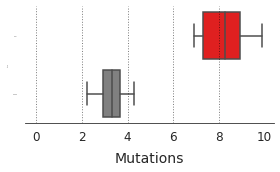

In [175]:
# initialize the plot
sns.set_style('white')
plt.figure(figsize=(4, 2.5))

# plot the isotype data
# sns.stripplot(data=isotype_df.loc[isotype_df['Isotype']=='IgG'], y='shared', x='Frequency', hue='shared', order=['shared', 'unshared'],
#               size=8, palette=color_dict, jitter=True, alpha=0.6, orient='h')

# plot the isotype data
sns.boxplot(data=df, y='shared', x='mut count', order=['shared', 'unshared'], fliersize=0,
#               size=8, 
            palette=color_dict, #jitter=True, alpha=0.6, 
             orient='h')

# plot the vertical reference lines

#style the plot
ax = plt.gca()
# set axis limits and labels
# ax.set_xlim([-0.02, 0.32])
ax.set_ylabel('Isotype', size=0, labelpad=4)
ax.set_xlabel('Mutations', size=14, labelpad=8)
# set tick params
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=0, length=0, width=1.25, pad=8, right=False)
# hide top, left and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for x in np.arange(0, 10, 2):
    ls = ':'
    lw = 1
    alpha=0.5
    plt.axvline(x=x, #ymin=0, ymax=10, 
                linewidth=lw, color='k', linestyle=ls, alpha=alpha)
# plot the mean IgM frequency
# plt.axvline(x=np.mean(igms), ymin=0.5, ymax=0.9, color='k', linestyle='dotted')
# ax.text(np.mean(igms) - 0.03,
#         0.475,
#         round(np.mean(igms), 2),
#         color=[0.25] * 3,
#         fontsize=13,
#         horizontalalignment='right')
# # plot the mean IgG frequency
# plt.axvline(x=np.mean(iggs), ymin=0.1, ymax=0.5, color='k', linestyle='dotted')
# ax.text(np.mean(iggs) + 0.03,
#         0.65,
#         round(np.mean(iggs), 2),
#         color=[0.25] * 3,
#         fontsize=12,
#         horizontalalignment='left')
# plot the segmented y-axis spines
# plt.axvline(x=-0.04, ymin=0.15, ymax=0.35, color='k', linewidth=2.5)
# plt.axvline(x=-0.04, ymin=0.65, ymax=0.85, color='k', linewidth=2.5)
# plot the legend
# ax.legend().set_visible(False)

# show or save

plt.tight_layout()
plt.savefig('../make_figures/figures/shared-unshared-shm-counts_boxplot.pdf')

plt.show()

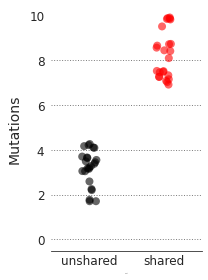

In [106]:
# initialize the plot
sns.set_style('white')
plt.figure(figsize=(3, 4))

# plot the isotype data
sns.stripplot(data=df, x='shared', y='mut count', hue='shared', order=['unshared', 'shared'],
              size=8, palette=color_dict, jitter=True, alpha=0.6, orient='v')
# sns.boxplot(data=df, x='shared', y='mut count', hue='shared', order=['unshared', 'shared'])

# plot the vertical reference lines

#style the plot
ax = plt.gca()
# set axis limits and labels
# ax.set_xlim([-0.04, 1.03])
ax.set_xlabel('Subject', size=0, labelpad=4)
ax.set_ylabel('Mutations', size=14, labelpad=8)
# set tick params
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=12, length=0, width=1.25, pad=4, right=False)
# hide top, left and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# plot the mean IgM frequency
# plt.axvline(x=np.mean(igms), ymin=0.5, ymax=0.9, color='k', linestyle='dotted')
# ax.text(np.mean(igms) - 0.03,
#         0.475,
#         round(np.mean(igms), 2),
#         color=[0.25] * 3,
#         fontsize=13,
#         horizontalalignment='right')
# # plot the mean IgG frequency
# plt.axvline(x=np.mean(iggs), ymin=0.1, ymax=0.5, color='k', linestyle='dotted')
# ax.text(np.mean(iggs) + 0.03,
#         0.65,
#         round(np.mean(iggs), 2),
#         color=[0.25] * 3,
#         fontsize=12,
#         horizontalalignment='left')
# plot the segmented y-axis spines
# plt.axhline(y=-0.04, ymin=0.15, ymax=0.35, color='k', linewidth=2.5)
# plt.axhline(y=-0.04, ymin=0.65, ymax=0.85, color='k', linewidth=2.5)
# plot the legend
for y in np.arange(0, 10, 2):
    ls = ':'
    lw = 1
    alpha=0.5
    plt.axhline(y=y, xmin=0, xmax=10, linewidth=lw, color='k', linestyle=ls, alpha=alpha)
ax.legend().set_visible(False)

# show or save

plt.tight_layout()
plt.savefig('../make_figures/figures/shared-unshared-shm-mean_scatter.pdf')

plt.show()

In [111]:
df=pd.read_csv('data/shared_unshared_cdr3aa/327059-2020_shm_counts.csv', index_col=0).sort_index()

In [125]:
def cdr3_length_histogram(df, color_dict, figfile=None, figsize=(6.5, 4),
                          style='white', legend_location='lower right',
                          shade=False, shade_alpha=0.1, legend=True,
                          ylim=(0, 0.16), xlim=(0, 25),
                          label_fontsize=14, tick_fontsize=12, legend_fontsize=12):
    # initialize the plot
    sns.set_style(style)    
    plt.figure(figsize=figsize)
    
    # plot the data
    for year in df.columns:
        color = color_dict[year]
        xs = df.index.values
        ys = df[year]
        plt.plot(xs, ys, c=color, alpha=0.8, label=year)
        if shade:
            shade_lower = [0] * len(xs)
            plt.fill_between(x=xs, y1=shade_lower, y2=ys, color=color, alpha=shade_alpha)
    
    # style the plot
    ax = plt.gca()
    # set axis limits and labels
    ax.set_xlim(xlim)
#     ax.set_ylim(ylim)
    ax.set_ylabel('Frequency', fontsize=label_fontsize, labelpad=6)
    ax.set_xlabel('Mutations', fontsize=label_fontsize)
    # style ticks
    locs = ax.get_yticks()
#     ax.set_yticks(np.arange(0, 0.14, 0.02))
    ax.tick_params(axis='x', which='major', labelsize=tick_fontsize)
    ax.tick_params(axis='y', which='major', labelsize=tick_fontsize, length=6, width=1.25, pad=6, right=False)
    # hide top, left and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # configure the legend
    if legend:
        handles, labels = ax.get_legend_handles_labels()
        labels=[l.replace('2016', 'TP1').replace('2020', 'TP2').replace('2021', 'TP2') for l in labels]
        ax.legend(handles, labels, loc='center left', bbox_to_anchor=(.55, 0.84), ncol=1, handletextpad=.5, labelspacing=0.5, fontsize=legend_fontsize, frameon=False)
    
    # save or show
    if figfile is not None:
#         plt.tight_layout()
        plt.savefig(figfile, bbox_inches="tight")
    else:
        plt.show()

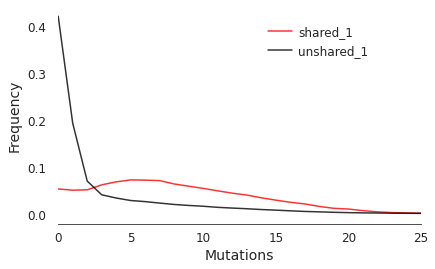

In [126]:
df=df/df.sum()
cdr3_length_histogram(df[['shared_1', 'unshared_1']], color_dict={'shared_1': 'red', 'unshared_1': 'k'})

In [118]:
df/df.sum()

,shared_1,shared_2,shared_3,shared_4,shared_5,shared_6,unshared_1,unshared_2,unshared_3,unshared_4,unshared_5,unshared_6
0,0.053303,NaN,NaN,NaN,NaN,NaN,4.215986e-01,NaN,NaN,NaN,NaN,NaN
1,0.050590,NaN,NaN,NaN,NaN,NaN,1.934883e-01,NaN,NaN,NaN,NaN,NaN
2,0.051368,NaN,NaN,NaN,NaN,NaN,7.002478e-02,NaN,NaN,NaN,NaN,NaN
3,0.062029,NaN,NaN,NaN,NaN,NaN,4.078050e-02,NaN,NaN,NaN,NaN,NaN
4,0.068402,NaN,NaN,NaN,NaN,NaN,3.389296e-02,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.000000,NaN,NaN,NaN,NaN,NaN,4.440708e-06,NaN,NaN,NaN,NaN,NaN
67,0.000000,NaN,NaN,NaN,NaN,NaN,2.220354e-06,NaN,NaN,NaN,NaN,NaN
68,0.000000,NaN,NaN,NaN,NaN,NaN,7.401179e-07,NaN,NaN,NaN,NaN,NaN
69,0.000000,NaN,NaN,NaN,NaN,NaN,1.480236e-06,NaN,NaN,NaN,NaN,NaN
